In [1]:
import os
from os import walk
import PIL.Image as pil
from PIL import Image  # using pillow-simd for increased speed
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
import seaborn as sns

In [2]:
def pil_loader_attention(path):
    
    print(path)
    # open path as file to avoid ResourceWarning
    # (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('L')

In [3]:
def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

# To create an kitti image + example of the corresponding attention masks + how to map it so 0.8

../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


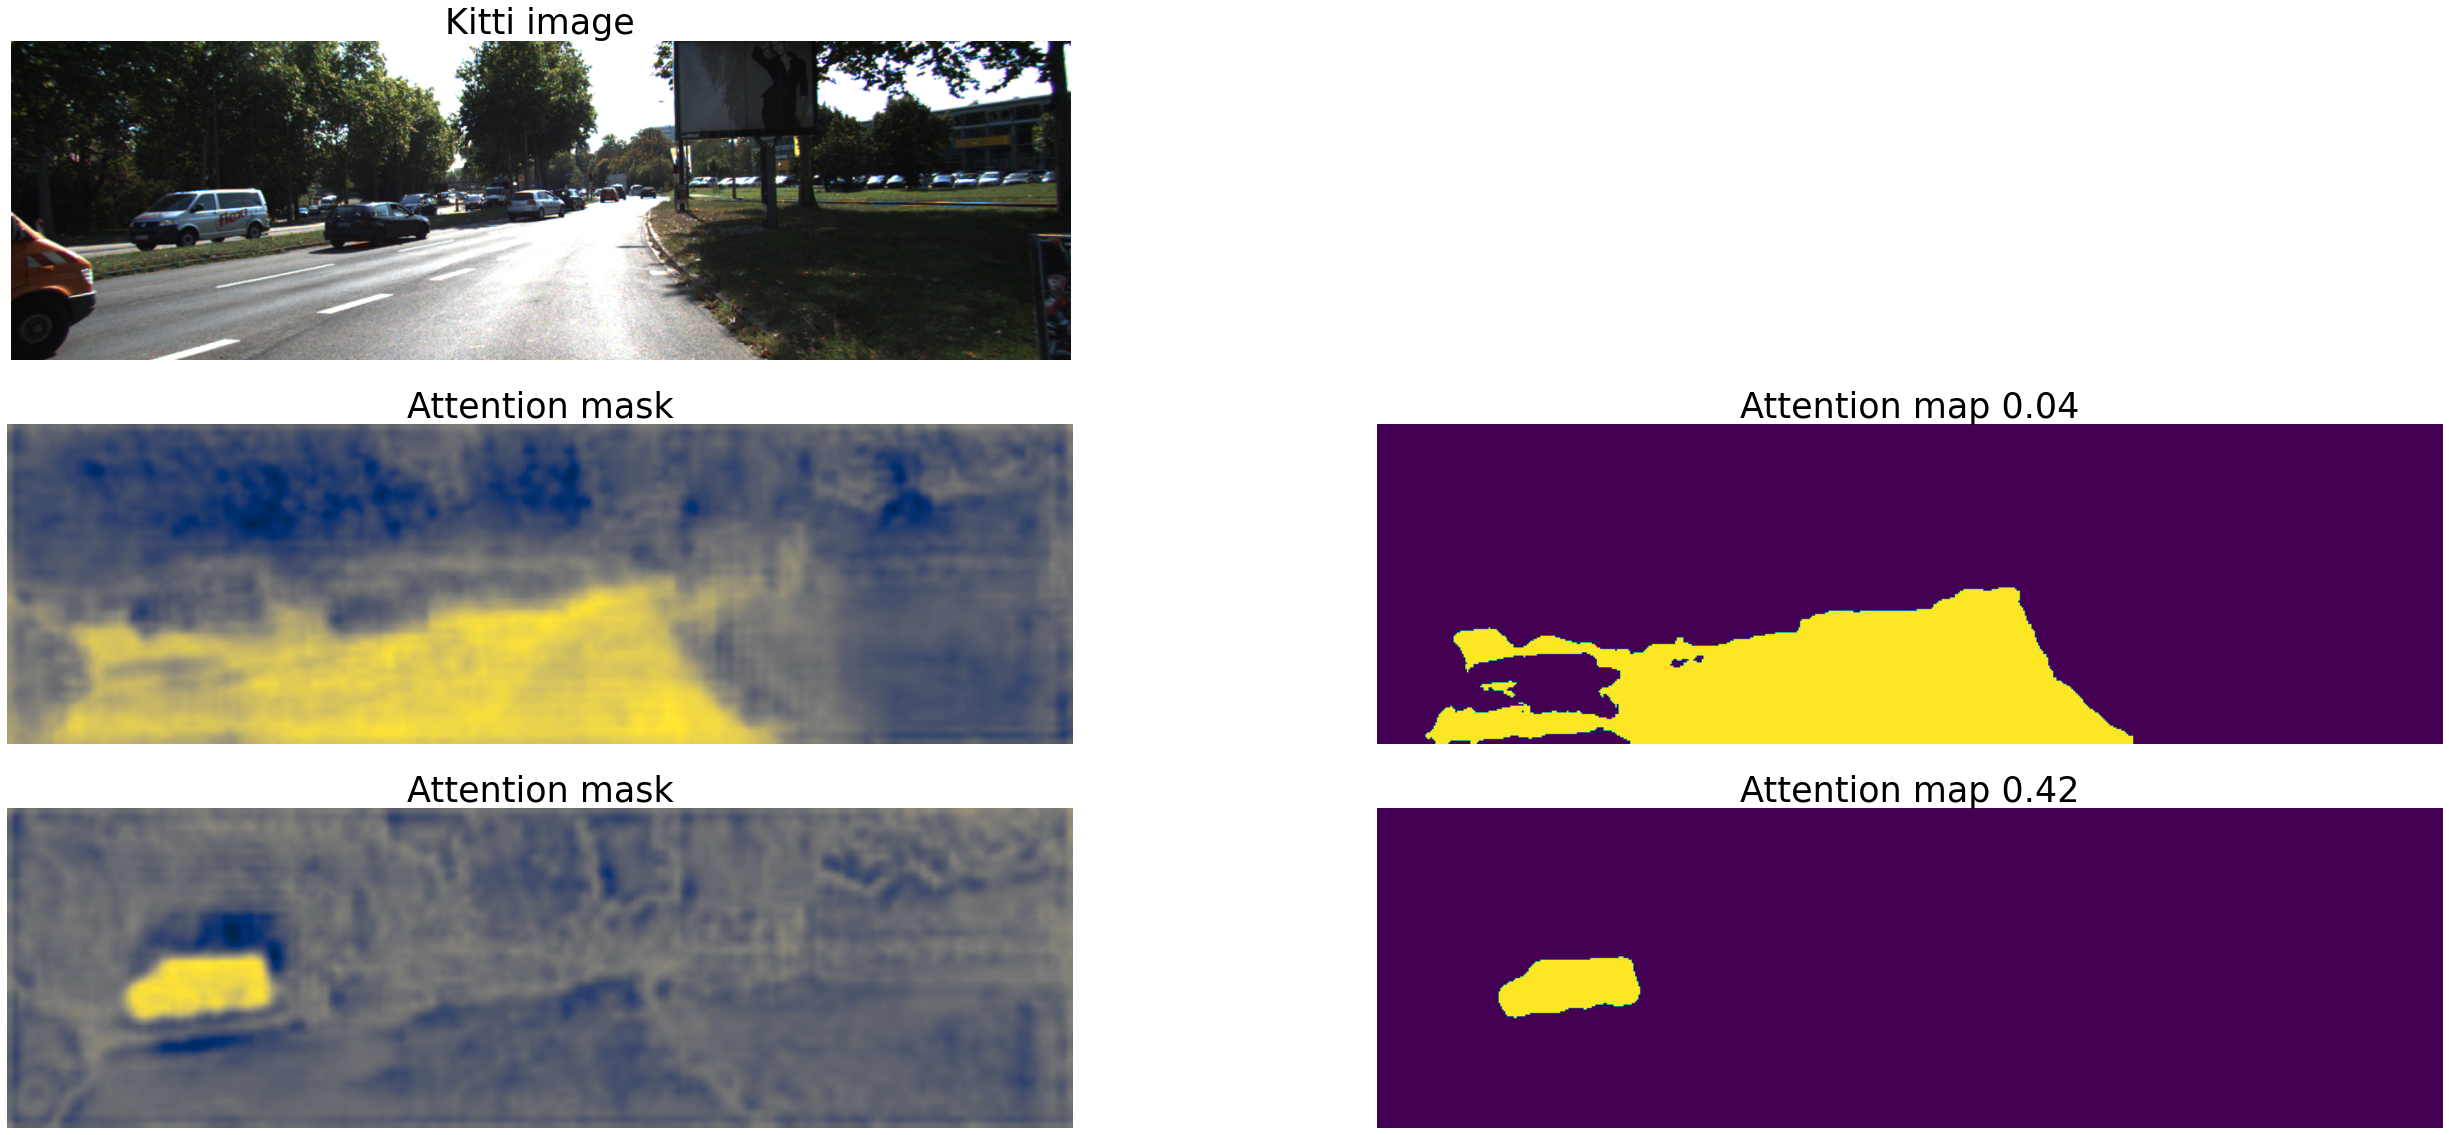

In [69]:

kitti_img = ('../../../kitti/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177.png')

kitti_img = pil_loader(kitti_img)

attention_path_1 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg')
attention_1 = pil_loader_attention(attention_path_1)
attention_1 = transforms.ToTensor()(attention_1).squeeze(0)

attention_path_2 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg')
attention_2 = pil_loader_attention(attention_path_2)
attention_2 = transforms.ToTensor()(attention_2).squeeze(0)


casted_attention_1 = attention_1.clone()
casted_attention_2 = attention_2.clone()

casted_attention_1[casted_attention_1 >= 0.8] = 1
casted_attention_1[casted_attention_1 < 0.8] = 0

casted_attention_2[casted_attention_2 >= 0.8] = 1
casted_attention_2[casted_attention_2 < 0.8] = 0
      
fig, axis = plt.subplots(3, 2, figsize=(45, 20))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

font_nr = 35

axis[0,0].set_title('Kitti image', fontsize = font_nr)
axis[0, 0].title.set_text('Kitti image')
axis[0, 0].axis('off')
axis[0, 0 ].imshow(kitti_img)

axis[1,0].set_title('Attention mask', fontsize = font_nr)
# axis[1, 0].title.set_text('Attention mask')
axis[1, 0].axis('off')
axis[1, 0 ].imshow(attention_1, cmap = 'cividis')



fig.delaxes(axis[0, 1])

axis[2,0].set_title('Attention mask', fontsize = font_nr)
# axis[2, 0].title.set_text('Attention mask')
axis[2, 0].axis('off')
axis[2, 0 ].imshow(attention_2, cmap = 'cividis')

w = casted_attention_1.sum().item()/950
w = 1 / w

# axis[1, 1].title.set_text(f'Attention map {round(w, 2)}')
axis[1,1].set_title(f'Attention map {round(w,2)}', fontsize = font_nr)
axis[1, 1].axis('off')
axis[1, 1 ].imshow(casted_attention_1)

w = casted_attention_2.sum().item()/950
w = 1 / w

axis[2,1].set_title(f'Attention map {round(w,2)}', fontsize = font_nr)
axis[2, 1].axis('off')
axis[2, 1].imshow(casted_attention_2)




# To create an kitti image + example of the corresponding attention masks + how to map it so 0.8 WITHOUT WEIGHT NUMBERS IN PLOT TITLE

../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg


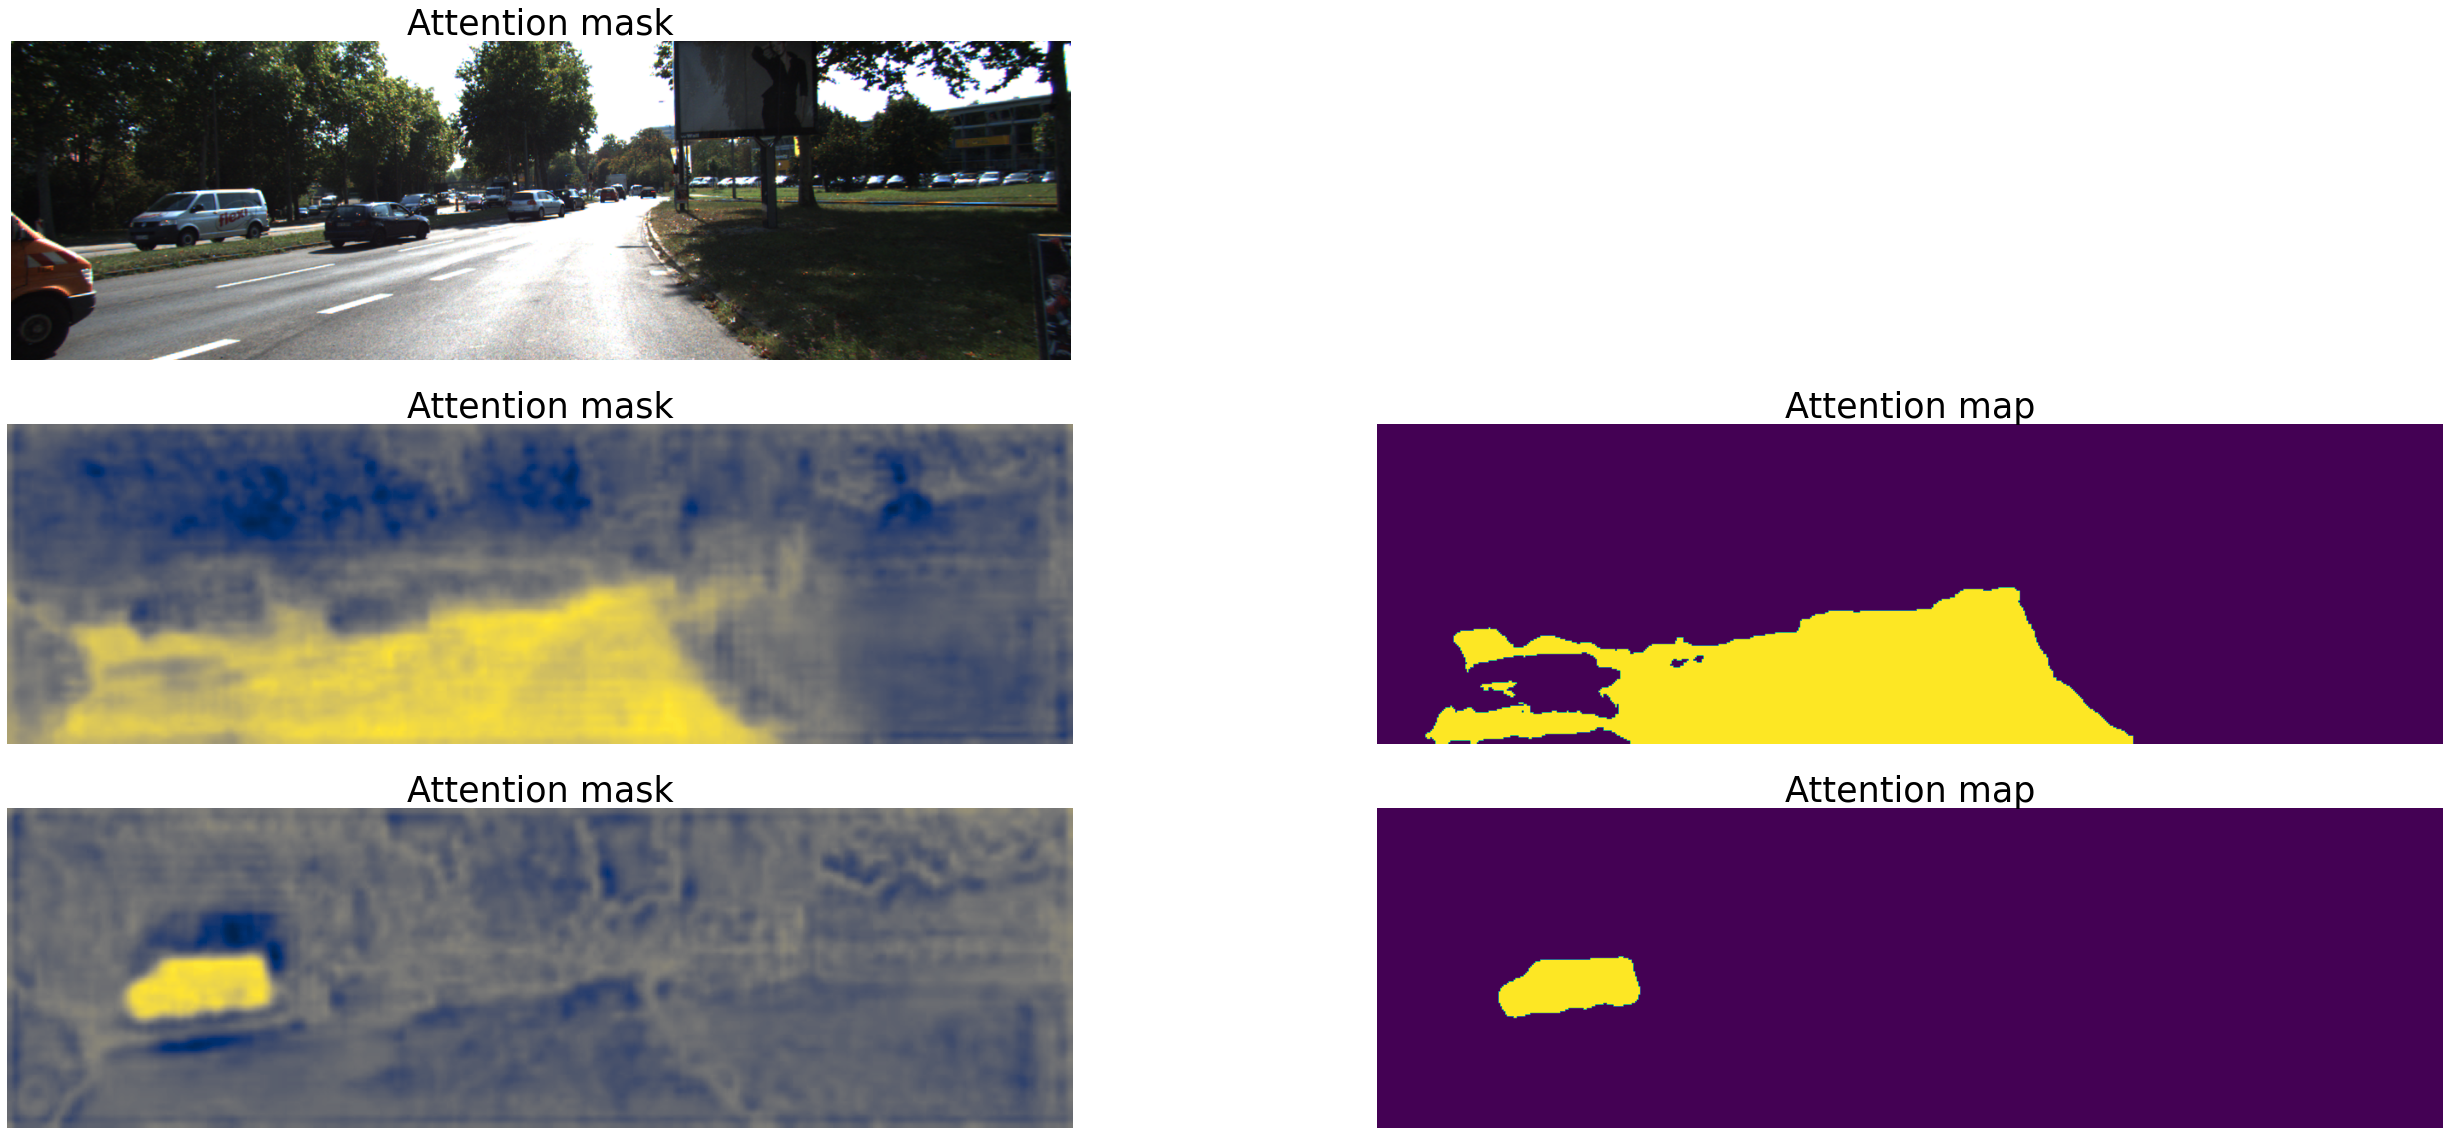

In [76]:

kitti_img = ('../../../kitti/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177.png')

kitti_img = pil_loader(kitti_img)

attention_path_1 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg')
attention_1 = pil_loader_attention(attention_path_1)
attention_1 = transforms.ToTensor()(attention_1).squeeze(0)

attention_path_2 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg')
attention_2 = pil_loader_attention(attention_path_2)
attention_2 = transforms.ToTensor()(attention_2).squeeze(0)


casted_attention_1 = attention_1.clone()
casted_attention_2 = attention_2.clone()

casted_attention_1[casted_attention_1 >= 0.8] = 1
casted_attention_1[casted_attention_1 < 0.8] = 0

casted_attention_2[casted_attention_2 >= 0.8] = 1
casted_attention_2[casted_attention_2 < 0.8] = 0
      
fig, axis = plt.subplots(3, 2, figsize=(45, 20))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

axis[0,0].set_title('Attention mask', fontsize = font_nr)
# axis[0, 0].title.set_text('Kitti image')
axis[0, 0].axis('off')
axis[0, 0 ].imshow(kitti_img)

axis[1 ,0].set_title('Attention mask', fontsize = font_nr)
# axis[1, 0].title.set_text('Attention mask')
axis[1, 0].axis('off')
axis[1, 0 ].imshow(attention_1, cmap = 'cividis')



fig.delaxes(axis[0, 1])


axis[2,0].set_title('Attention mask', fontsize = font_nr)
# axis[2, 0].title.set_text('Attention mask')
axis[2, 0].axis('off')
axis[2, 0 ].imshow(attention_2, cmap = 'cividis')

w = casted_attention_1.sum().item()/950
w = 1 / w

axis[1,1].set_title(f'Attention map', fontsize = font_nr)
# axis[1, 1].title.set_text(f'Attention map')
axis[1, 1].axis('off')
axis[1, 1 ].imshow(casted_attention_1)

w = casted_attention_2.sum().item()/950
w = 1 / w


axis[2,1].set_title(f'Attention map', fontsize = font_nr)
# axis[2, 1].title.set_text(f'Attention map')
axis[2, 1].axis('off')
axis[2, 1].imshow(casted_attention_2)




## WEIGHT MATRIX CALCULATION EXAMPLE

<AxesSubplot:title={'center':'Weight mask'}>

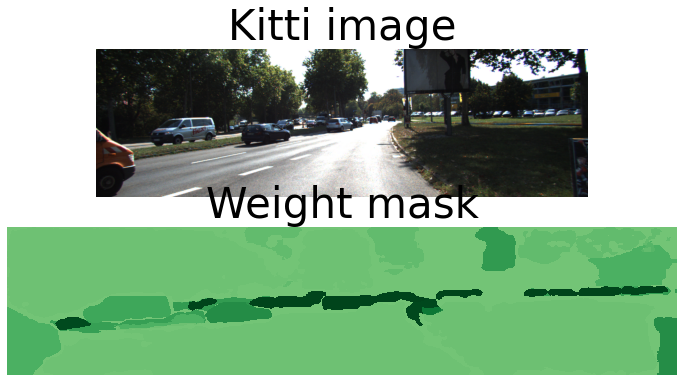

In [92]:

weight_mask = ('../../../weight_mask/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/threshold_0.5_method_avg.pt')

weight_mask = torch.load(weight_mask)
kitti_img = ('../../../kitti/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177.png')

kitti_img = pil_loader(kitti_img)

      
fig, axis = plt.subplots(2, 1, figsize=(12, 6))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

axis[0].title.set_text('Kitti image')
axis[0].axis('off')
axis[0].imshow(kitti_img)

axis[1].title.set_text('Weight mask')
axis[1].axis('off')
sns.heatmap(weight_mask, ax=axis[1], vmin=1, vmax=1.2, cmap='Greens', center=1, cbar=False)

## corresponding attention masks

../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/98_0.454.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/92_0.07.jpg


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


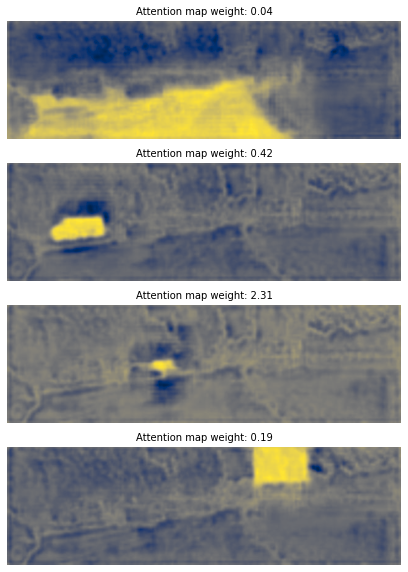

In [90]:
attention_path_1 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg')
attention_1 = pil_loader_attention(attention_path_1)
attention_1 = transforms.ToTensor()(attention_1).squeeze(0)

attention_path_2 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg')
attention_2 = pil_loader_attention(attention_path_2)
attention_2 = transforms.ToTensor()(attention_2).squeeze(0)

attention_path_3 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/98_0.454.jpg')
attention_3 = pil_loader_attention(attention_path_3)
attention_3 = transforms.ToTensor()(attention_3).squeeze(0)

attention_path_4 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/92_0.07.jpg')
attention_4 = pil_loader_attention(attention_path_4)
attention_4 = transforms.ToTensor()(attention_4).squeeze(0)


casted_attention_1 = attention_1.clone()
casted_attention_2 = attention_2.clone()
casted_attention_3 = attention_3.clone()
casted_attention_4 = attention_4.clone()

casted_attention_1[casted_attention_1 >= 0.8] = 1
casted_attention_1[casted_attention_1 < 0.8] = 0

casted_attention_2[casted_attention_2 >= 0.8] = 1
casted_attention_2[casted_attention_2 < 0.8] = 0

casted_attention_3[casted_attention_3 >= 0.8] = 1
casted_attention_3[casted_attention_3 < 0.8] = 0

casted_attention_4[casted_attention_4 >= 0.8] = 1
casted_attention_4[casted_attention_4 < 0.8] = 0
     
    
fig, axis = plt.subplots(4, 1, figsize=(20, 10))

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 35}

# matplotlib.rc('font', **font)

font_nr = 10

w = casted_attention_1.sum().item()/950
w = 1 / w


axis[0].set_title(f'Attention map weight: {round(w, 2)}', fontsize = font_nr)
# axis[0].title.set_text(f'Attention mask weight: {round(w, 2)}')
axis[0].axis('off')
axis[0].imshow(attention_1, cmap = 'cividis')

w = casted_attention_2.sum().item()/950
w = 1 / w

axis[1].set_title(f'Attention map weight: {round(w, 2)}', fontsize = font_nr)
# axis[1].title.set_text(f'Attention mask weight: {round(w, 2)}')
axis[1].axis('off')
axis[1].imshow(attention_2, cmap = 'cividis')

w = casted_attention_3.sum().item()/950
w = 1 / w

axis[2].set_title(f'Attention map weight: {round(w, 2)}', fontsize = font_nr)
# axis[2].title.set_text(f'Attention mask weight: {round(w, 2)}')
axis[2].axis('off')
axis[2].imshow(attention_3, cmap = 'cividis')

w = casted_attention_4.sum().item()/950
w = 1 / w

axis[3].set_title(f'Attention map weight: {round(w, 2)}', fontsize = font_nr)
axis[3].axis('off')
axis[3].imshow(attention_4, cmap = 'cividis')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'Weight mask'}>

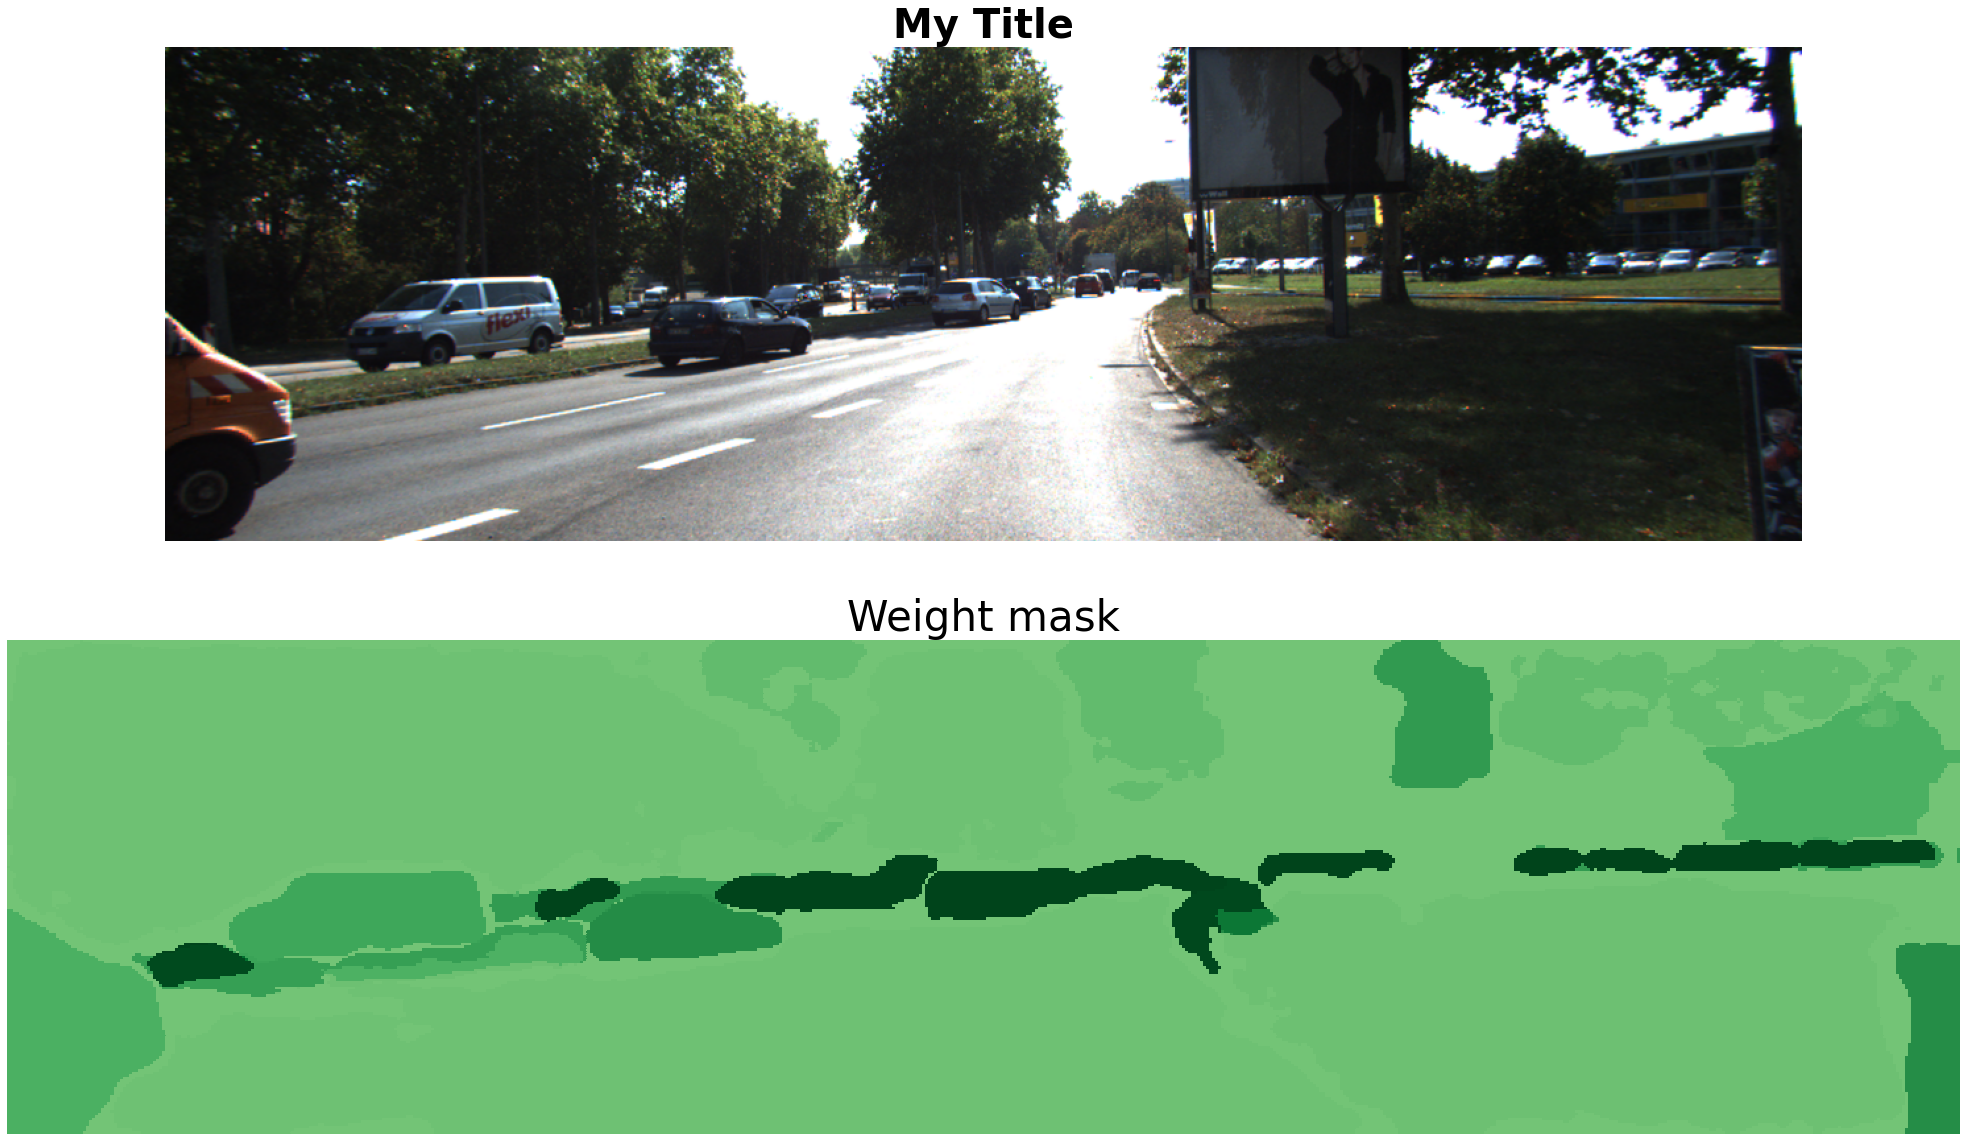

In [91]:

weight_mask = ('../../../weight_mask/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/threshold_0.5_method_avg.pt')

weight_mask = torch.load(weight_mask)
kitti_img = ('../../../kitti/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177.png')

kitti_img = pil_loader(kitti_img)

      
fig, axis = plt.subplots(2, 1, figsize=(35, 20))

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 25}

# matplotlib.rc('font', **font)

# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)


# axis[0].title.set_text('Kitti image')
axis[0].set_title('My Title', fontdict={'fontsize': 40, 'fontweight': 'bold'})
axis[0].axis('off')

axis[0].imshow(kitti_img)

axis[1].title.set_text('Weight mask')
axis[1].axis('off')
sns.heatmap(weight_mask, ax=axis[1], vmin=1, vmax=1.2, cmap='Greens', center=1, cbar=False)

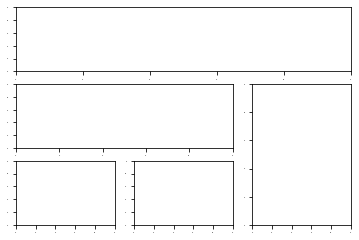

In [22]:
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 0.5}



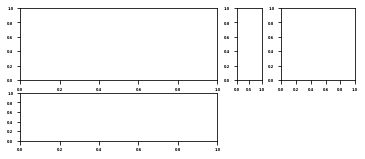

In [49]:
import matplotlib.gridspec as gridspec


matplotlib.rc('font', **font)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 3.5}

gs = gridspec.GridSpec(3, 2,
                       width_ratios=[8, 1],
                       height_ratios=[3, 2]
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
